In [1]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

c:\Users\Anton Wijaya\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv(
    "../../data/eval_results_gemini_25_flash.csv",
    sep=";",
    engine="python",
    on_bad_lines="skip"
)

In [3]:
model = SentenceTransformer("all-MiniLM-L6-v2")

In [4]:
question_emb = model.encode(df["question"].tolist())
answer_emb = model.encode(df["answer"].tolist())

In [5]:
similarities = [
    cosine_similarity([q], [a])[0][0]
    for q, a in zip(question_emb, answer_emb)
]

In [6]:
df["similarity_score"] = similarities
df[["question", "answer", "similarity_score"]].head(100)

,question,answer,similarity_score
0,Laptop apa yang cocok untuk gaming budget 15 j...,"Maaf, datanya belum cukup.\r\n\r\nDari informa...",0.733522
1,"Laptop ringan untuk kuliah, RAM minimal 8GB",Berikut adalah pilihan laptop yang ringan untu...,0.681059
2,"Saya punya budget 8 juta, laptop apa yang pali...","Dengan budget 8 juta, berikut adalah rekomenda...",0.670752
3,Lebih baik pilih laptop dengan SSD 512GB atau ...,Untuk kebutuhan menginstal banyak aplikasi dan...,0.746223
4,Laptop apa yang cocok untuk kerja kantoran ful...,Untuk kerja kantoran full Microsoft Office den...,0.638306
...,...,...,...
95,"Kalau saya punya budget 10 juta, sebaiknya pil...","Maaf, datanya belum cukup. Semua produk laptop...",0.749732
96,Laptop apa yang cocok untuk mahasiswa teknik s...,Untuk mahasiswa teknik sipil yang akan menjala...,0.607971
97,Saya ingin laptop yang enak dipakai untuk kons...,Berdasarkan budget Rp9.000.000 dan kebutuhan u...,0.696671
98,Laptop apa yang cocok untuk developer fullstac...,Berikut adalah laptop yang cocok untuk develop...,0.611903


In [7]:
THRESHOLD = 0.6

df["predicted_relevant"] = df["similarity_score"] >= THRESHOLD
df["is_relevant"] = (df["similarity_score"] >= 0.6).astype(int)

In [8]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(df["is_relevant"], df["predicted_relevant"])
print(cm)

print(classification_report(df["is_relevant"], df["predicted_relevant"]))

[[ 5  0]
 [ 0 95]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        95

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



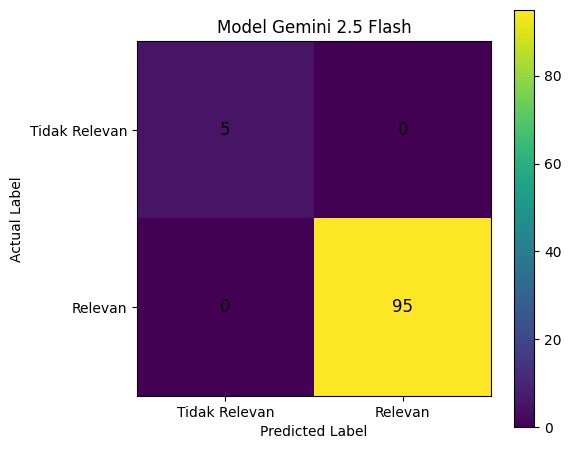

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
plt.imshow(cm)
plt.title("Model Gemini 2.5 Flash")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.xticks([0,1], ["Tidak Relevan", "Relevan"])
plt.yticks([0,1], ["Tidak Relevan", "Relevan"])

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center", fontsize=12)

plt.colorbar()
plt.tight_layout()
plt.show()